### Yelp Rating Predictor Project - Supervised Machine Learning Model

#### 1.0 Research Goal
Yelp, is a public company headquartered in San Francisco, California which publishes crowd-sourced reviews about businesses!
By collecting the dataset of different restaurant features and their Yelp ratings from the company site, I will use a **Multiple Linear Regression model** to investigate what factors most affect a restaurant's Yelp rating and **predict the Yelp rating for any given restaurant** which has not yet been made available at their site.

*This information is critical to business owners who wish to determine the features that most affect their reputation (on Yelp) so they can better prepare for a successful venture*.

#### 2.0 Collecting Data
In this project I will be working with a real dataset provided by Yelp. I will use six files, listed below with a brief description of what each entails:
* `yelp_business.json`: Establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: User profile metadata by business
* `yelp_checkin.json`: Online checkin metadata by business
* `yelp_tip.json`: Tip metadata by business
* `yelp_photo.json`: Photo metadata by business

#### 3.0 Understanding the Data

In [1]:
import pandas as pd 
business = pd.read_json("yelp_business.json", lines=True)
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [2]:
business.head(3)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [3]:
print(business.shape)

(188593, 22)


The **Yelp Business Dataset** comprises of 22 features and 188,593 businesses registered.
* Numeric features - 12
* Structural features - 10

In [4]:
review = pd.read_json("yelp_review.json", lines=True)
review.head(3)

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81


In [5]:
print(review.shape)

(188593, 7)


The **Yelp Review Dataset** comprises of 7 features and 188,593 businesses registered.
* Numeric features - 6
* Structural features - 1

In [6]:
user = pd.read_json("yelp_user.json", lines=True)
user.head(3)

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815


In [7]:
print(user.shape)

(188593, 6)


The **Yelp User Dataset** comprises of 6 features and 188,593 businesses registered.
* Numeric features - 5
* Structural features - 1

In [8]:
checkin = pd.read_json("yelp_checkin.json", lines=True)
checkin.head(3)

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3


In [9]:
print(checkin.shape)

(157075, 4)


The **Yelp User Dataset** comprises of 4 features and 157,075 businesses registered.
* Numeric features - 2
* Structural features - 2

In [10]:
tip = pd.read_json("yelp_tip.json", lines=True)
tip.head(3)

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10


In [11]:
print(tip.shape)

(121526, 3)


The **Yelp Tip Dataset** comprises of 3 features and 121,526 businesses registered.
* Numeric features - 2
* Structural features - 1

In [12]:
photo = pd.read_json("yelp_photo.json", lines=True)
photo.head(3)

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136


In [13]:
print(photo.shape)

(32976, 3)


The **Yelp Photo Dataset** comprises of 3 features and 32,976 businesses registered.
* Numeric features - 2
* Structural features - 1

#### 4.0 Organising Data

Since we take into account 6 different JSON files, comprising of numerous features - we need to streamline our study by combing all the data into a single DataFrame that allows us to analyze the different features with respect to our target variable: **Yelp rating** in a more conclusive manner.

We will now merge all 6 different files into one single DataFrame using the common feature: **Business_ID**.

In [14]:
df = pd.merge(business, review, how='left', on='business_id')
df = pd.merge(df, user, how='left', on='business_id')
df = pd.merge(df, checkin, how='left', on='business_id')
df = pd.merge(df, tip, how='left', on='business_id')
df = pd.merge(df, photo, how='left', on='business_id')

In [15]:
print(df.shape)

(188593, 40)


We have merged all the 6 files into a single Dataframe, comprising of:
* Total Features: 40
* Total Businesses registered: 188593

#### 5.0 Data Cleansing
Data Cleansing is one of the most important tasks before analysing data as it attempts to produce meaningful data that is deviod of any human entry errors.
In this Machine Learning project, we need to clean our data so we can focus on the features that might have predictive power for determining an establishment's Yelp rating

Linear Regression Model are developed when our dependent and independent variables are continous in nature. Hence, we can further clean our data by excluding features which are neither (1) continous nor (2) binary and (3) those which we do not wish to include in our study.

In [16]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

We have removed 14 features from our DataFrame which were neither continuous nor binary and did not seem to add much value in evaluating a restaurant's Yelp Rating using **Linear Regression Model**.

Irrelevant or partially relevant features can negatively impact model performance.
* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

Now we just have to check our data to make sure we don't have any missing values, or NaNs, which will prevent the Linear Regression model from running correctly.

In [17]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

we can now investigate the features which have missing values and attempt to find an appropriate value to replace these


In [18]:
list_of_features_with_nan = ['weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']
print(df[list_of_features_with_nan].head(10))

   weekday_checkins  weekend_checkins  average_tip_length  number_tips  \
0              11.0              18.0           38.000000          6.0   
1               0.0               1.0           66.000000          1.0   
2               2.0               5.0           32.000000          1.0   
3               1.0               0.0                 NaN          NaN   
4               2.0               0.0                 NaN          NaN   
5             345.0             440.0           56.051282         39.0   
6               1.0               0.0                 NaN          NaN   
7               NaN               NaN                 NaN          NaN   
8              75.0              54.0           48.833333         18.0   
9               5.0               3.0          115.000000          1.0   

   average_caption_length  number_pics  
0                     NaN          NaN  
1                    29.0          1.0  
2                     NaN          NaN  
3                    

#### 6.0 Data Imputation

Since features like: **average_caption_length** and **number_pics** have a large number of missing values possibly because of businesses not inputting them on Yelp - we can impute these values rather than dropping the entire column for a more reasonable framework. Dropping columns could lead to a loss of potential information which could be important in predicting our target.

In [19]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(df))
new_df.columns = df.columns

In [20]:
print(new_df.shape)

(188593, 26)


In [21]:
new_df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

We have successfully replaced all missing values with the respective **means** of each column. This method ensures that we do not have any potential loss of valuable information by fitting the average i.e an educated guess.

Upon checking for any missing values, our consistent output of **'False'** confirms that all missing values have been filled in for.

In [22]:
new_df.shape

(188593, 26)

Our cleaned Dataframe: '**new_df**' comprises of 26 Features and 188,593 Businesses registered

#### 7.0 Feature Selection
Feature Selection is essentially one of the most important tasks in order to get the best fit model for prediction. It involves selecting a combination of those features, which will substantially improve the accuracy of your model in predicting the target at a given level of confidence.

##### Data Correlation
Data Correlation Is a way to understand the relationship between multiple variables and attributes in your dataset.
By calculating the correlation between our features (independent variables) and our target (dependent variable), we can get a sensing of the underlying causal relationship. 
*The features with the best correlations could prove to be the most helpful for our Linear Regression model*


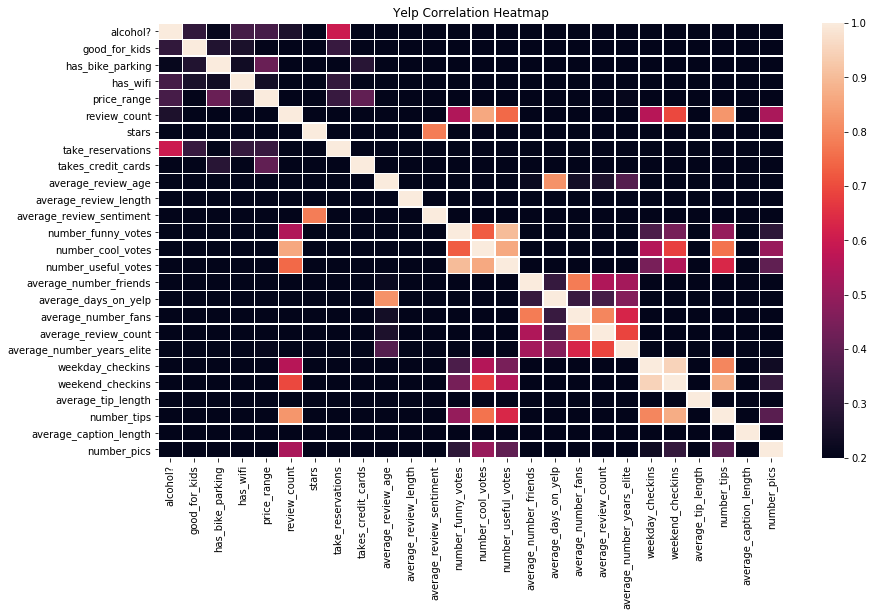

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
correlation = new_df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(data=correlation, vmin=0.2, vmax=1, linewidths=.5)
plt.title("Yelp Correlation Heatmap")
plt.show()

##### HeatMap Analysis
The above Heatmap depicts the correlation of all the independent variables with respect to each other. However, our focus would be on the **stars** row, which illustrates that only the '**average_review_sentiment**' feature has a strong positive correlation with our Target. All other features seem to show a week positive correlation.

This framework suggests that the '**average_review_sentiment**' feature would be a strong determinant of our target variable but we must include other features, to ensure we are not underfitting the model.

#### 8.0 Defining different subsets of Data

Since our correlation analysis only points out to a single feature, we would need to find various groupings of our features in order to make sure our model finds the best fit (i.e neither it is underfit nor it is overfit).
For this we would attempt to define different subsets of data into the following clusers:


In [24]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [25]:
# subset of all features that have a response range [0,1] i.e binary in nature
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [26]:
# subset of all features that vary on a greater range than [0,1] i.e continous in nature
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [27]:
# all features
all_features = binary_features + numeric_features

After defining these 4 groups, we would now evaluate our models using each group in order to maximise our accurancy of the prediction

#### 9.0 Building our Regression Models

Now that we have lists of different feature subsets, we can create new models from them.

For Evaluation, we would be using the **coefficient of determination R^2** as a measure of accuracy. The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

*In other words, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data*. We can perform this using the score( ) method from the LinearRegression module.

**We can now factor in our method to calculate the score and also split the data into a train and test set by defining the following function below**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = new_df.loc[:,'stars']
    features = new_df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted, alpha=0.05, color='green')
    plt.xlabel('Actual Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

After devising our above function, we can now key in all 4 groups of data to create 4 separate models and evaluate each one of them. The model with the best R^2 and the most promising Coefficients will be able to form the basis of our study!

In brief, the following 4 groups of data defined above are:
* `sentiment`: only average_review_sentiment
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features

#### 10.0 Testing & Evaluating the Models

##### 10.1 Sentiment Model

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


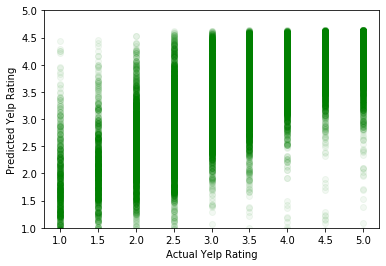

In [29]:
model_these_features(sentiment)

##### 10.2 Binary Features Model

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208039676), ('alcohol?', -0.14549670708138332), ('has_wifi', -0.13187397577762547), ('good_for_kids', -0.08632485990337231), ('takes_credit_cards', 0.07175536492195614), ('take_reservations', 0.04526558530451594)]


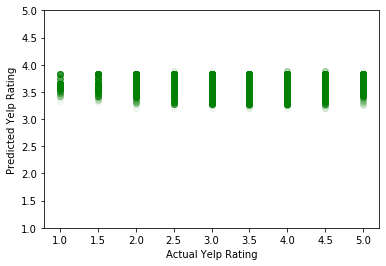

In [30]:
model_these_features(binary_features)

##### Analysing Model 10.1 vs Model 10.2

Model 10.1, which only takes a single feature: **average_review_sentiment** produces a train and test score of ~ 0.61 due to having a strong correlation with the target variable: **stars**.
This feature's coefficient is 2.30 which suggests a positive trend i.e as the independent variable increases, the dependent variable increases in magnitude too!
This supports the strength of the feature because as the 'Actual yelp Rating' increases from 1.0 to 5.0 - so does the 'Predicted Yelp rating' prooving that this feature gives an accurate results.
It can further be verified by looking at the scatter plot of this model. The **dark green regions** tend to become denser as we move from a rating of 1.0 to a rating of 5.0 showing that it is a strong positive trend.

Model 10.2, on the other hand, takes only **binary features** into account. We can see that a low train and test score is produced of ~ 0.012 due to the weak correlation between these features and the target variable.
From this model, we also see that **has_bike_parking** has the largest coefficient of about 0.19 which suggests a weak positive trend. The unstability of this model is also seen on the scatter plot where the positive trend is not clear.
There seems to be no consistent increase in the 'Predicted Yelp Rating' when we move from a low 'Actual Yelp Rating' of 1.0 to 5.0, suggesting that just taking binary features into account is a very weak model.

Conclusion: Even though Model 1 seems to be a more powerful model in predicting the yelp rating, we cannot alone base our study onto it, as it could be a case of underfitting! We need to consider other groups of features so our model is more robust and conclusive in predicting the yelp rating.

##### 10.3 Numeric Features Model


Train Score: 0.6710983772346415
Test Score: 0.6691704803908975
[('average_review_sentiment', 2.274552962205909), ('price_range', -0.08844814499842141), ('average_number_years_elite', -0.07448971844187495), ('number_pics', 0.00203501196988473), ('average_number_fans', 0.0011239535387988883), ('number_cool_votes', 0.0008973881208748371), ('number_tips', 0.0008604370404416798), ('average_caption_length', 0.0007473198860840789), ('review_count', -0.0007147045822966941), ('average_review_length', -0.000582808809495149), ('average_review_count', -0.00022290685431274927), ('number_useful_votes', -0.00016814846768387914), ('average_review_age', -0.0001644795502594517), ('average_days_on_yelp', 0.00012949901959292536), ('average_tip_length', 0.00012062019573894198), ('average_number_friends', 3.910381654160296e-05), ('number_funny_votes', -3.5098738404141205e-05), ('weekday_checkins', -2.234358269951275e-05), ('weekend_checkins', -8.639084321839036e-06)]


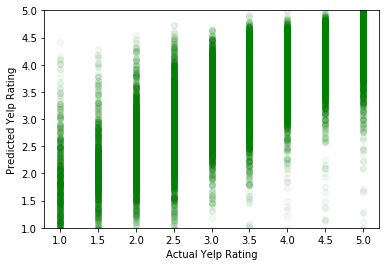

In [31]:
model_these_features(numeric_features)

##### 10.4 All Features Model

Train Score: 0.6801792242564924
Test Score: 0.6776259720284956
[('average_review_sentiment', 2.2843452071458477), ('alcohol?', -0.15413771424912198), ('has_wifi', -0.1281141655250973), ('good_for_kids', -0.12611342336839723), ('price_range', -0.06557860490694867), ('average_number_years_elite', -0.06346995952759868), ('has_bike_parking', 0.023043968153193477), ('takes_credit_cards', 0.02258024263134792), ('take_reservations', 0.011219091961068513), ('average_number_fans', 0.0010783045751414245), ('number_cool_votes', 0.0008531590471657528), ('number_tips', 0.0007666082052227456), ('average_caption_length', 0.0007498956115616003), ('average_review_length', -0.0005912971114895119), ('number_pics', 0.00047746821602695695), ('number_useful_votes', -0.0002533005445261243), ('average_review_count', -0.00023529556944007954), ('review_count', -0.0002189741201432), ('average_review_age', -0.00015711949019748322), ('average_days_on_yelp', 0.00012340179960000077), ('weekend_checkins', -8.11798257

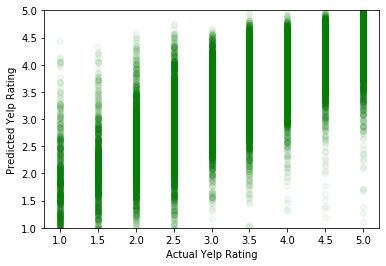

In [32]:
model_these_features(all_features)

##### Analysing Model 10.3 vs Model 10.4

Both these models show a much more promising result as compared to Model 10.1 & Model 10.2!
We see that both these models have a higher R^2 Score with Model 10.4 achieving the best score of ~ 0.680 and 0.678 for it's train and test model respectively.

Model 10.4 seems to have more features with a better coefficient, which produces a more promising scatter graph showing a strong positive trend. Here, the density of the points follow a strong positive trend suggesting that there is a minimal error between the Predicted Yelp Rating and the Actual Yelp Rating. As we move from 1.0 to 5.0 on the x axis, we see that the density of the points also uniformly increase from 1.0 to 5.0 on the y axis.

Hence, by testing for the R^2 score, lisiting the coefficients and illustrating the trend using a scatter plot - it is suggested that Model 10.4 is the best approach in making the prediction for our target variable. It includes all the features (numeric + binary): providing concrete information for the algorithm to find patterns and make educated guesses. Hence, we can be assured that we are not overfitting the model as the score and the trend seem to be consistent with the result.

#### 11.0 Reaching a Conclusion

From the above analysis, we are sure that Model 10.4 is the best fit for this Multiple linar Regression model.
we will now construct this model as we are sure it comprises of optimum features.

In [33]:
features = new_df.loc[:, all_features]
ratings = new_df.loc[:, 'stars']
X_train, X_test, Y_train, Y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 12.0 Selected Model - For Business Owners to Study

##### 12.1 Overview

In [34]:
features.shape

(188593, 25)

The Final Model comprises of **25 Features**, which are a combination of Binary and Numerical values. 
**We will now give a short description of each feature so the user is aware what features takes what sort of input. This would allow them to fill in their own values and hence get a meaningful prediction!**

###### 12.11 Binary Features
* alcohol?: integer, 0 or 1 for does not serve alcohol or serves alcohol in some capacity, respectively.
* has_bike_parking: integer, 0 or 1 for does not have bike parking or does have bike parking, respectively.
* takes_credit_cards: integer, 0 or 1 for does not take credit cards or does take credit cards, respectively.
* good_for_kids: integer, 0 or 1 for not child friendly establishment or child friendly establishment, respectively.
* take_reservations: integer, 0 or 1 for does not take reservations or takes reservations, respectively.
* has_wifi: integer, 0 or 1 for does not have wifi or does have wifi, respectively.

###### 12.12 Numeric Features
* review_count: integer, number of reviews.
* price_range: integer, 0, 1, 2, 3, or 4 for price of meal/service with 0 being least expensive and 4 being most expensive.
* average_caption_length: float, average length of photo caption, in characters, for photos on business' Yelp page.
* number_pics: integer, total number of pictures posted on business' Yelp page.
* average_review_age: float, average age of reviews, in days, on business' Yelp page.
* average_review_length: float, average length of review, in characters, on business' Yelp page.
* average_review_sentiment: float, from -1 to 1, representing the average sentiment of reviews on business' Yelp page, with -1 being most negative, 0 being neutral, and 1 being positive.
* number_funny_votes: integer, total number of funny votes given to reviews on business' Yelp page.
* number_cool_votes: integer, total number of cool votes given to reviews on business' Yelp page.
* number_useful_votes: integer, total number of useful votes given to reviews on business' Yelp page
* average_tip_length: float, average length of tip, in characters, on business' Yelp page.
* number_tips: integer, total number of tips left on business' Yelp page
* average_number_friends: float, average number of friends for all businesses' reviewers.
* average_days_on_yelp: float, average days on Yelp for all businesses' reviewers.
* average_number_fans: float, average number of fans for all businesses' reviewers.
* average_review_count: float, average number of total reviews for all businesses' reviewers.
* average_number_years_elite: float, average number of years with elite status for all businesses' reviewers.
* weekday_checkins: integer, total number of checkins at business during Mondays, Tuesdays, Wednesdays and Thursdays.
* weekend_checkins: integer, total number of checkins at business during Fridays, Saturdays and Sundays.

##### 12.2 Statistical Analysis
Apart from understanding the inputs the Business owners would need to key in, we have also provided a small statistical analysis - listing the mean, min & max of each feature - so they have a guided benchmark to follow. This allows them to key in their input values more efficiently!

In [35]:
pd.DataFrame(list(zip(
    features.columns,
    features.describe().loc['mean'],
    features.describe().loc['min'],
    features.describe().loc['max'])), 
    columns=['Features', 'Mean', 'Min', 'Max'])

,Features,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,16.195511,0.000000,140.000000
9,number_pics,8.521106,1.000000,1150.000000


The above table lists the key statistical information about the **25 Features that are most significant to this study**! 
Now using this table as a reference and taking into account their own business operations - Business owners can fill in the following inputs (listed in the next section) to accurately predict what Yelp Rating their busines can get.

*This will give them an insight onto the specific features they lack on and the areas they can focus on - to uplift their reputation and venture success in the long run!*

#### 13.0 Making Predictions - For Business Owners to Fill

##### 13.1 Instructions to Business Owners
Based on business knowledge for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values! The first blank corresponds with the feature at index=0 in the DataFrame above, **alcohol?**, and the last blank corresponds to the feature at index=24, **weekend_checkins**.

* **Binary Features** : Make sure to enter either 0 or 1 for all binary features!
* **Numeric Features** : Make sure to enter a reasonable numerical value. Refer to the statistical table (12.2) to have an idea about the mean, min & max of each feature.



##### 13.2 Make the Prediction

In [36]:
Your_business = np.array([_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]).reshape(1, -1)

ValueError: cannot copy sequence with size 25 to array axis with dimension 4

In [ ]:
model.predict(Your_business)

Now, after inputting a number for all 25 blanks, run the above 2 cells by pressing [shift] + [enter]

The above cell gives the **Predicted Yelp Rating**, your restaurant would have had if listed on Yelp. 
Your inputs play a robust role in determining the rating of your restaurant, so do have realistic inputs as it would mimic what a large sample of people would have wrote in. 

Play around with this prediction model by inputting in different values so you can have a more clear insight onto which particular features are the most impoertant to work on, to uplift the success and reputation of the business.

#### 14.0 Why was this Study Important?

* Marketing Opportunity - Yelp, has collected over 171 million reviews and continues to be a strong source of restaurant reviews. It is important that your business has a good rating on this trending website, so it is able to attract large pools of customers from all across the state! It allows you to market your business in a rather cost effective manner!

* Improving Customer Service - By taking into account these 25 Features, Business Owners now have an idea which key factors actually define the success of the business! For instance, due to the presence of the **'has_wifi'** feature - business owners now can considering setting up internet access in their restaurant as it would place them higher on the yelp rating chart. This small initial investment could infact attract a large pool of customers from all across the state!

* Understanding Market Gaps - Similar to the above point, Business owners now have a chance to study the features they lack on, such as the features **'good_for_kids'** or **'has_bike_parking'**. In order to increase their chances of success, they can fill in these gaps but catering for the above 2 features like adding in a kids menu or creating spaces for bikes to park. This not only will push their restaurant up in the Yelp Rating Chart, but would also increase their long term business profitability.

**In essence, This study gives essential insights to business owners on how to fill market gaps, improve customer service, build brand loyalty and also improve their chances of attracting consumers through a multi-surfed website like Yelp.
This study not only attempts to quantify a mere prediction but rather focuses on the insights it can provide to the businesses. This is one important aspect of fully studying this project and explains why this project lays so much importance on understanding the features that are critical to business succces**.

#### 15.0 Acknowledgements
The Datasets provided in this Project are taken from Yelp, through the platform of Kaggle.